### Importing the necessary libraries -

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, accuracy_score, confusion_matrix
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

sns.set()
sns.set_style("white")
%matplotlib inline
rcParams['figure.figsize'] = [20,10]

### Loading the dataset -

In [3]:
df = pd.read_csv(r'datasets\LabourTrainingEvaluationData.csv')

In [4]:
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


### Information about the dataset attributes and memory usage -

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


### Statistical description -

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15992.0,33.225238,11.045216,16.0,24.00000,31.000,42.0000,55.00
Nodeg,15992.0,0.295835,0.456432,0.0,0.00000,0.000,1.0000,1.00
Earnings_1974,15992.0,14016.800304,9569.795893,0.0,4403.45225,15123.580,23584.1800,25862.32
Earnings_1975,15992.0,13650.803376,9270.403225,0.0,4398.82300,14557.110,22923.7375,25243.55
Earnings_1978,15992.0,14846.659673,9647.391524,0.0,5669.29800,16421.975,25564.6700,25564.67


#### No. of Unique Values in each column -

In [7]:
unique_values = df.nunique()
display(unique_values.sort_values(ascending=False).to_frame(name='Unique Values'))

,Unique Values
Earnings_1975,7615
Earnings_1974,7333
Earnings_1978,7243
Age,40
Eduacation,5
Race,2
Hisp,2
MaritalStatus,2
Nodeg,2


### Dimensions of the data -

In [8]:
print((df.shape),'\n')
print("Shape of LabourTrainingEvaluationData.csv: ", df.shape)

(15992, 9) 

Shape of LabourTrainingEvaluationData.csv:  (15992, 9)


In [9]:
df.columns

Index(['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg',
       'Earnings_1974', 'Earnings_1975', 'Earnings_1978'],
      dtype='object')

In [10]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# EDA -

## Data Cleaning -
### a. Check for Missing Values
### b. Handle Missing Values
### c. Remove Duplicates

In [11]:
df.isnull().sum()

Age              0
Eduacation       0
Race             0
Hisp             0
MaritalStatus    0
Nodeg            0
Earnings_1974    0
Earnings_1975    0
Earnings_1978    0
dtype: int64

In [12]:
df.dtypes

Age                int64
Eduacation        object
Race              object
Hisp              object
MaritalStatus     object
Nodeg              int64
Earnings_1974    float64
Earnings_1975    float64
Earnings_1978    float64
dtype: object

### Checking for duplicate rows -

In [13]:
duplicates = df[df.duplicated()]

In [14]:
duplicates

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
60,33,HighSchool,NotBlack,NotHispanic,Married,0,25862.32,25243.55,25564.67
250,54,HighSchool,NotBlack,NotHispanic,Married,0,0.00,0.00,0.00
252,55,Intermediate,NotBlack,NotHispanic,Married,0,25862.32,25243.55,25564.67
298,44,HighSchool,NotBlack,NotHispanic,Married,0,25862.32,25243.55,25564.67
306,32,Intermediate,NotBlack,NotHispanic,Married,0,25862.32,25243.55,25564.67
...,...,...,...,...,...,...,...,...,...
15946,31,HighSchool,NotBlack,NotHispanic,Married,0,25862.32,25243.55,0.00
15948,28,Intermediate,NotBlack,NotHispanic,Married,0,25862.32,25243.55,25564.67
15949,39,LessThanHighSchool,NotBlack,NotHispanic,Married,1,25862.32,25243.55,25564.67
15984,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,25862.32,25243.55,25564.67


In [15]:
df = df.drop_duplicates()

### Univariate Analysis -

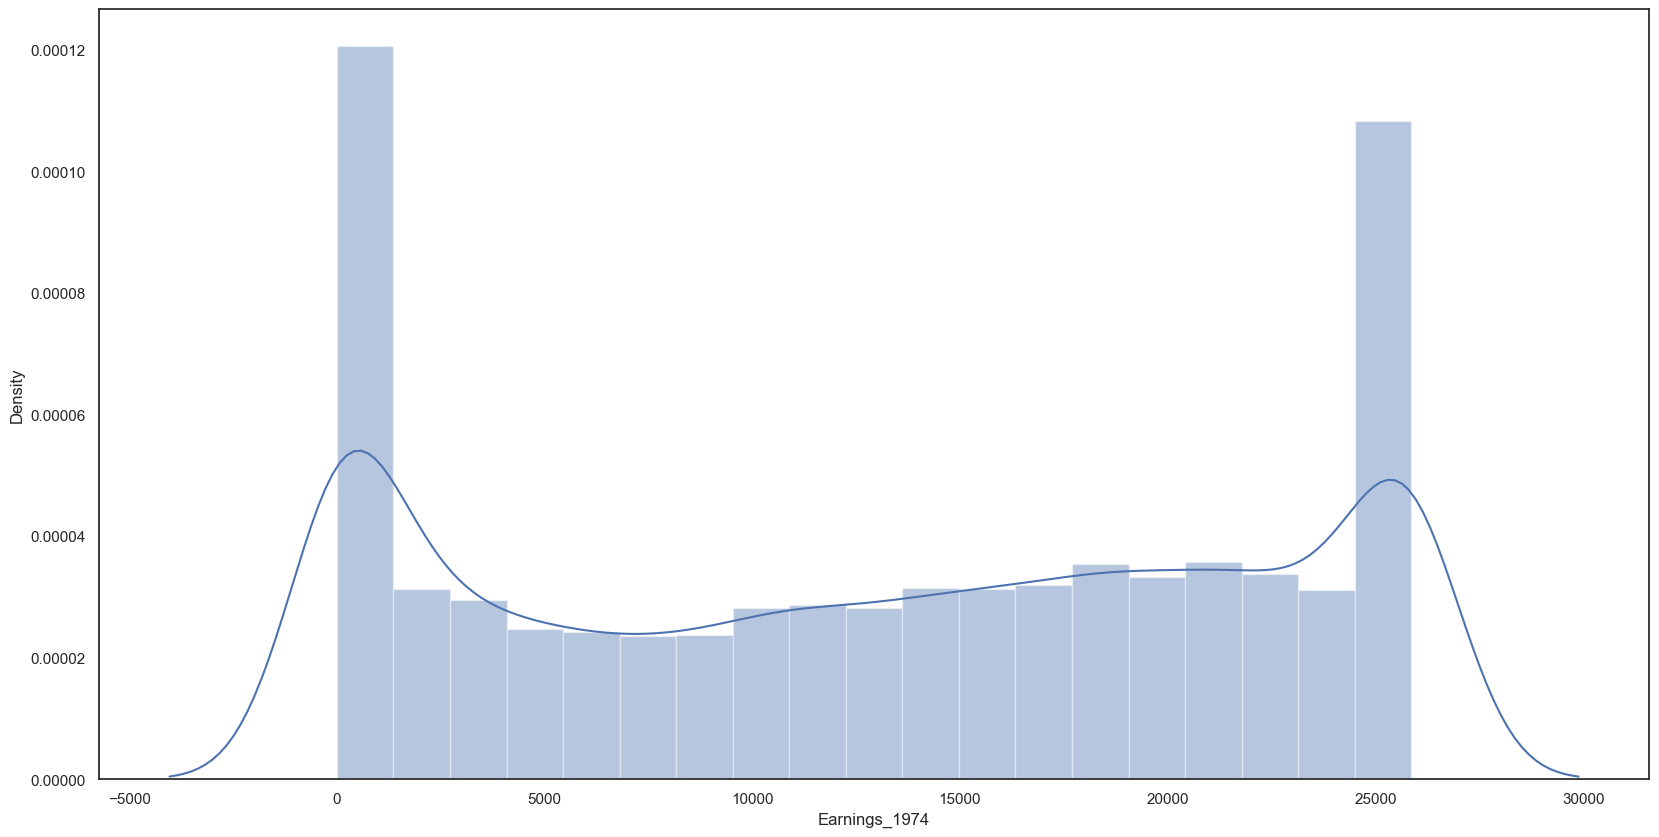

In [16]:
sns.distplot(df['Earnings_1974'],kde = True)
plt.show()

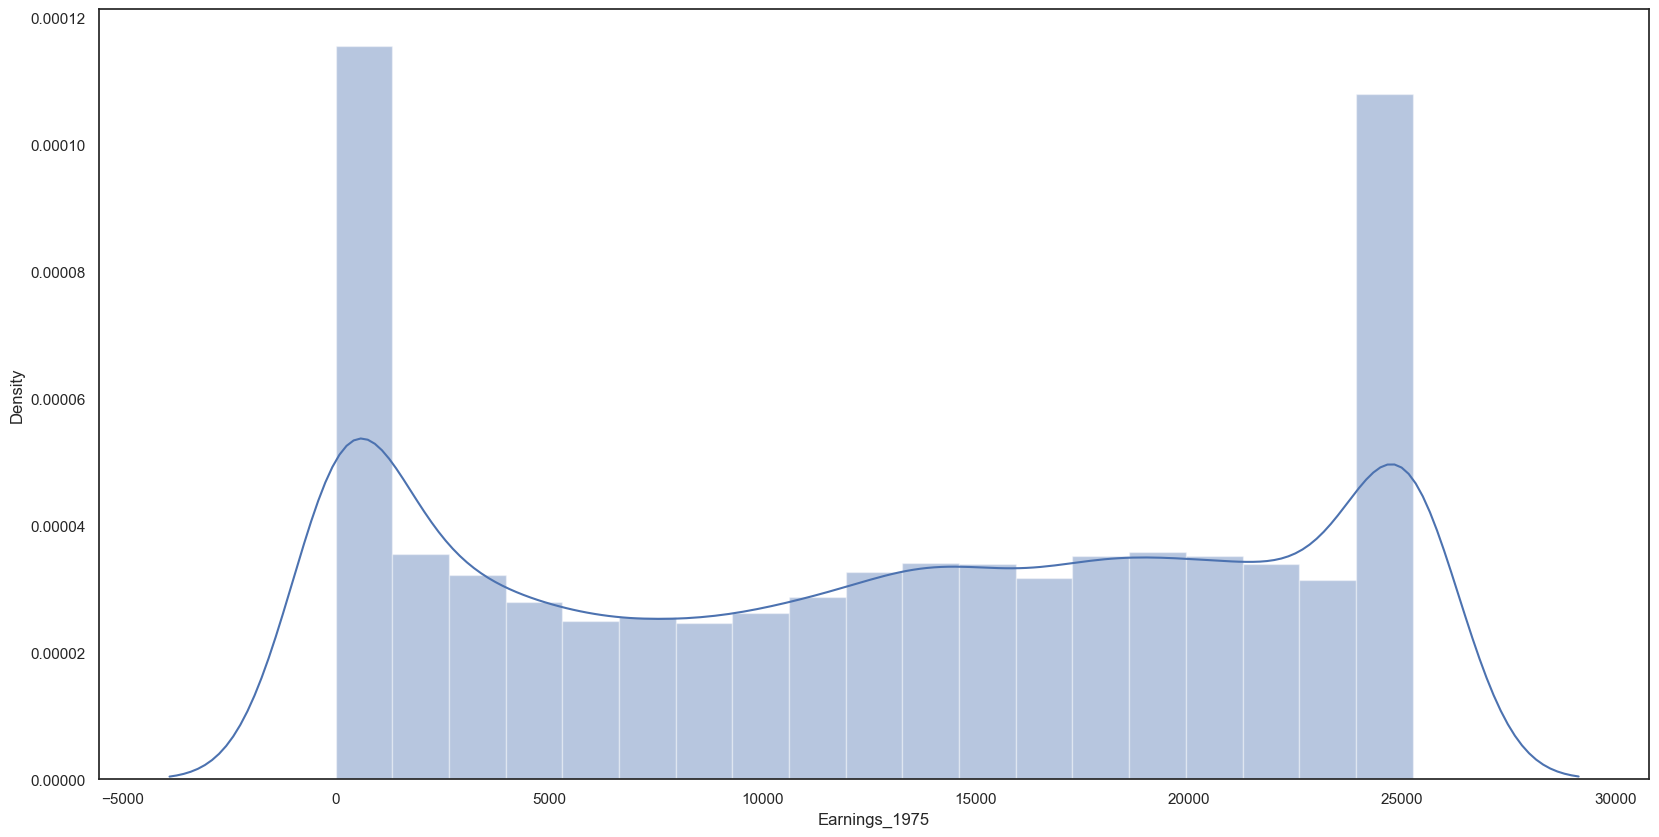

In [17]:
sns.distplot(df['Earnings_1975'], kde = True)
plt.show()

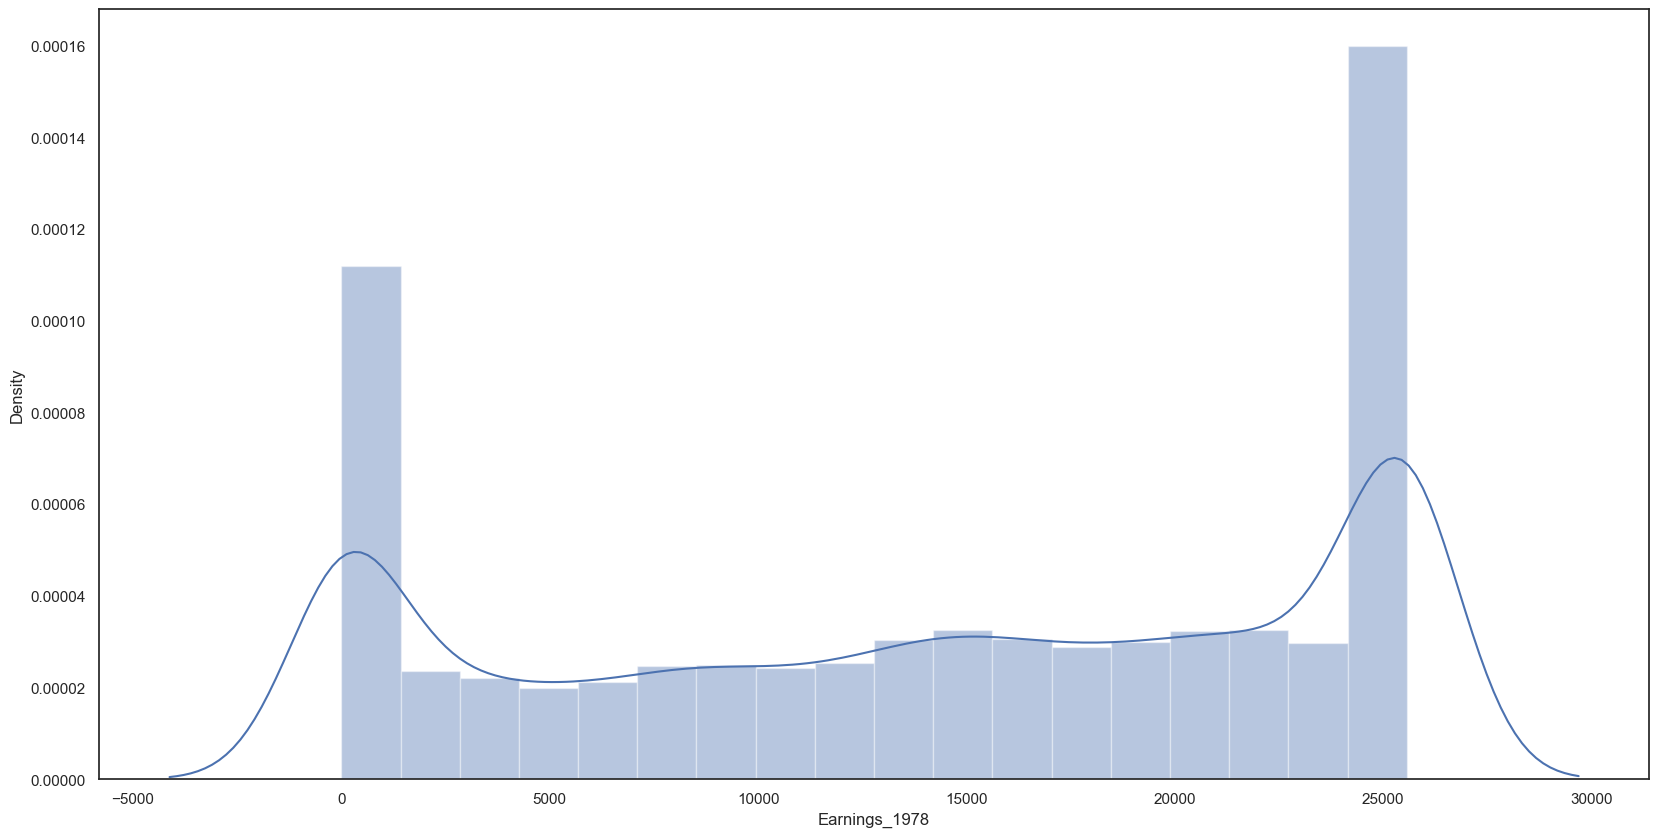

In [18]:
sns.distplot(df['Earnings_1978'], kde = True)
plt.show()

## 📊 Insights: Earnings in 1974, 1975, 1978

- The distribution of `Earnings` is **bimodal**, with two prominent spikes near **0** and **25,000**.
- A significant portion of individuals reported **no earnings**, while another group reported earnings near the **upper cap**, indicating **data clumping or censoring**.
- The distribution is **right-skewed**, and not normal — caution is needed when applying statistical models that assume normality.

In [19]:
encoder = LabelEncoder()
for col in cat_cols:
        df[col] = encoder.fit_transform(df[col])

In [20]:
types = df.dtypes
display(types.to_frame(name='Data Types'))

,Data Types
Age,int64
Eduacation,int64
Race,int64
Hisp,int64
MaritalStatus,int64
Nodeg,int64
Earnings_1974,float64
Earnings_1975,float64
Earnings_1978,float64


### Checking for outliers -

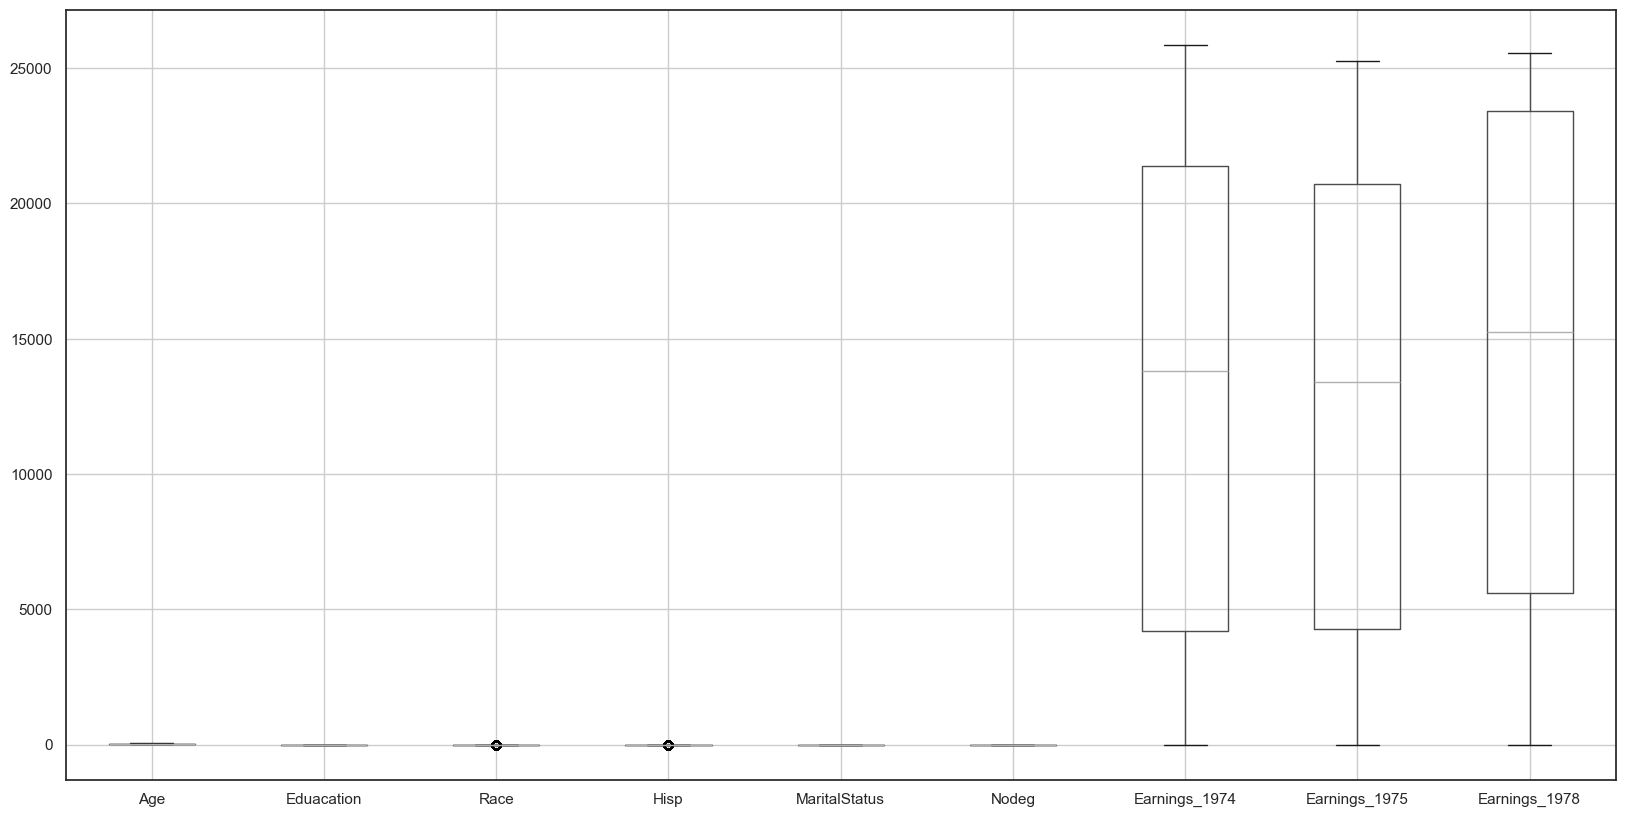

In [21]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

### Multi - Variate Analysis -

#### Correlation Matrix -

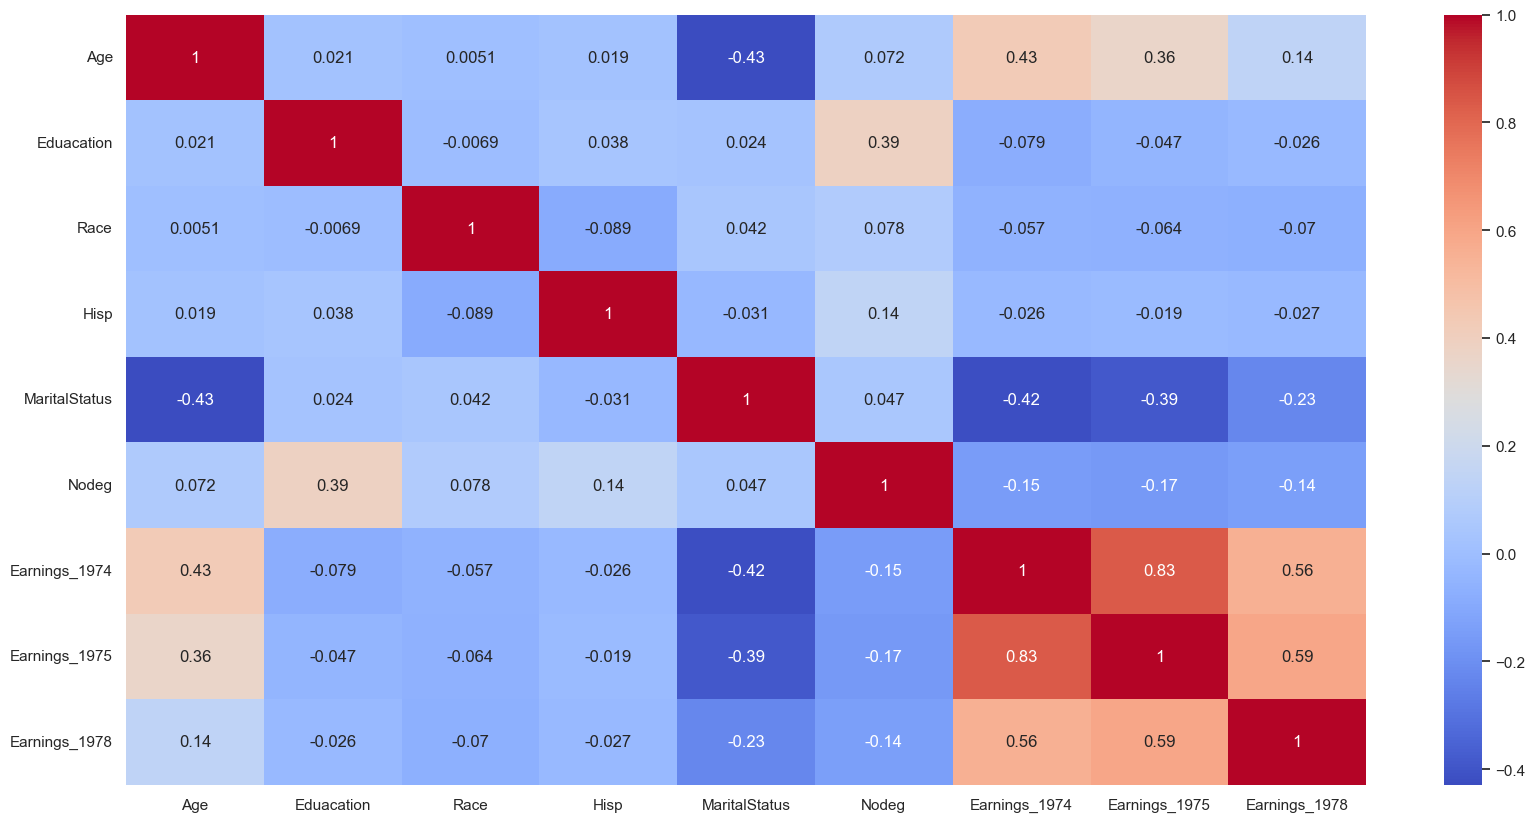

In [22]:
sns.heatmap(df.corr(), cmap = "coolwarm", annot=True)
plt.show()

## Insights -
 Earnings in 1974 and 1975 are heavily correlated.

## Descriptive Statistics -
### What are the mean, median, and standard deviation of the ages of individuals in the dataset?

In [23]:
mean = df['Age'].sum()/df.shape[0]
mean

np.float64(32.32380271622588)

In [24]:
median = df['Age'].median()
median

30.0

In [25]:
std = df['Age'].std()
std

11.003574220606053

# Splitting the dataset -

### Creating the Features and Target Variable -

In [26]:
X = df.drop('Earnings_1978', axis = 1)
y = df['Earnings_1978']

In [27]:
X.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975
0,45,2,0,0,0,1,21516.670,25243.550
1,21,1,0,0,1,0,3175.971,5852.565
2,38,0,0,0,0,0,23039.020,25130.760
3,48,2,0,0,0,1,24994.370,25243.550
4,18,2,0,0,0,1,1669.295,10727.610


In [28]:
y.head()

0    25564.670
1    13496.080
2    25564.670
3    25564.670
4     9860.869
Name: Earnings_1978, dtype: float64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

# Training a Linear Regressor -

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

# Evaluating the model on the test data -

In [32]:
y_pred = model.predict(X_test)

### 1. R2 Score -

In [33]:
r2_score(y_test, y_pred)

0.37843228608962143

### 2. MSE -

In [34]:
mean_squared_error(y_test, y_pred)

53162318.76393128

### 3. RMSE -

In [35]:
root_mean_squared_error(y_test, y_pred)

7291.249465210423

### 4. MAE -

In [36]:
mean_absolute_error(y_test, y_pred)

5629.7765136707685

## Checking Linear Regression Assumptions
To ensure the validity of our linear regression model for predicting Labour earning for 1978, we need to check the following assumptions:
1. Linearity
2. Independence of errors
3. Homoscedasticity (constant variance of errors)
4. Normality of residuals
5. No multicollinearity among predictors

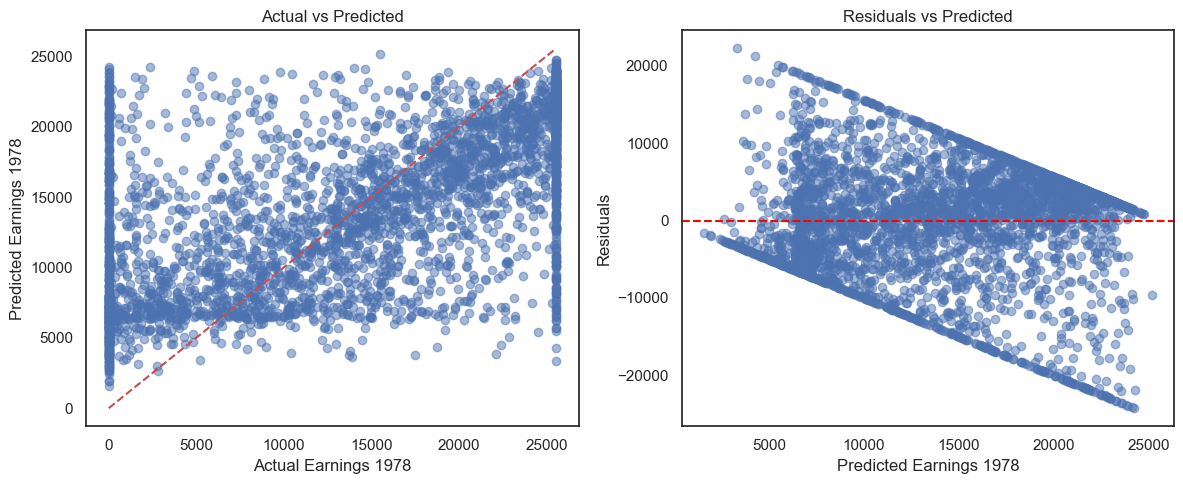

In [37]:
# 1. Linearity: Plotting predicted vs actual and residuals vs predicted
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Earnings 1978')
plt.ylabel('Predicted Earnings 1978')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.subplot(1,2,2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Earnings 1978')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.tight_layout()
plt.show()

1. Linearity
    Check: Left plot (Actual vs Predicted)

    Interpretation: The red line is the ideal y = x line. The predictions don't follow this line very well—especially at extreme values—indicating poor linearity. A strong linear pattern is absent, and a funnel shape is visible.

    Conclusion: ❌ Linearity is not present. Model may be underfitting or missing nonlinear terms.

## Plotting the line of regression -

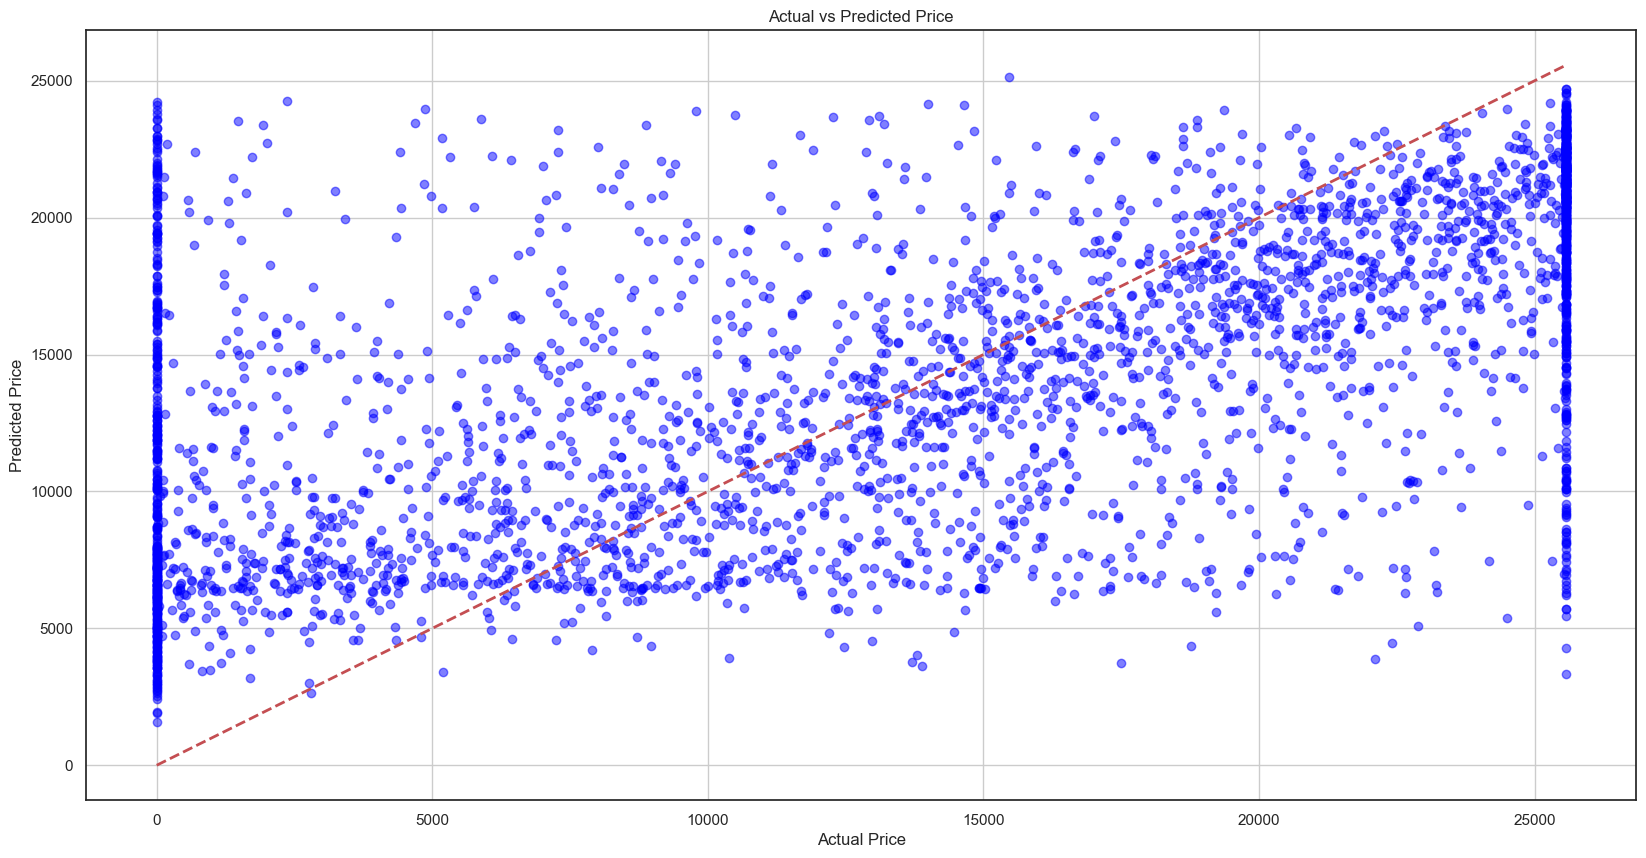

In [38]:
plt.scatter(y_test, y_pred,color = 'blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.show()